In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# **Load the dataset**

In [ ]:
df = pd.read_csv('most-polluted-countries.csv')

# **Task 1: Dataset Preparation**

In [ ]:
years = np.arange(2014, 2024)
trend = 0.5 * years  # Linear trend
seasonality = np.sin(2 * np.pi * (years - 2014) / 5)

# Add random noise
np.random.seed(0)
noise = np.random.normal(0, 2, len(years))

pollution_levels = trend + seasonality + noise

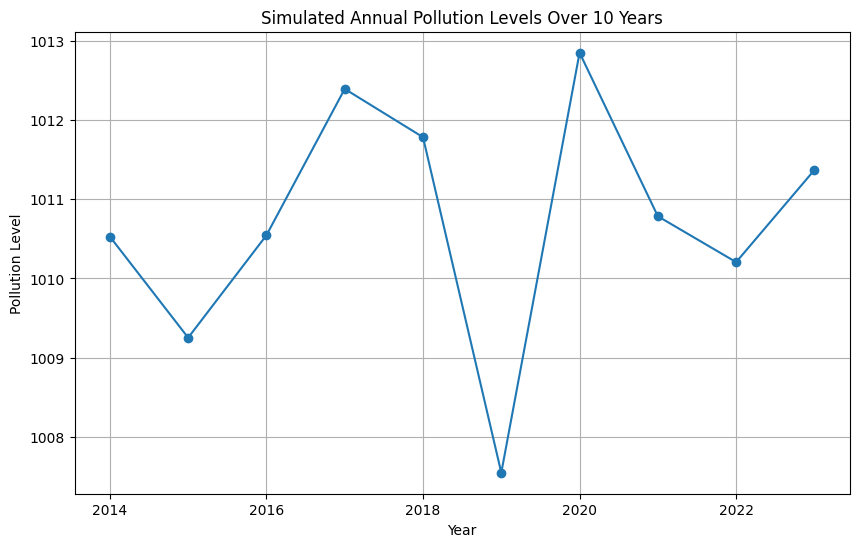

In [10]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(years, pollution_levels, marker='o')
plt.title('Simulated Annual Pollution Levels Over 10 Years')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.grid(True)
plt.show()

# **Task 2: Stationarity Testing**

In [14]:
# Perform Augmented Dickey-Fuller test
result = adfuller(pollution_levels)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the test results
if result[1] < 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is non-stationary (fail to reject the null hypothesis).')


ADF Statistic: -3.335243223200017
p-value: 0.01337474736642671
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
The time series is stationary (reject the null hypothesis).


# **Task 3: ARIMA Model Identification**

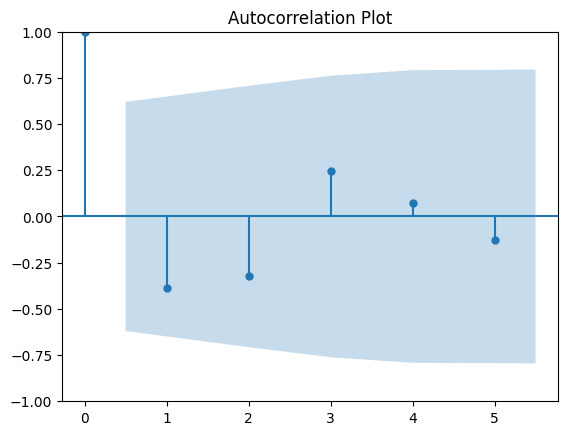

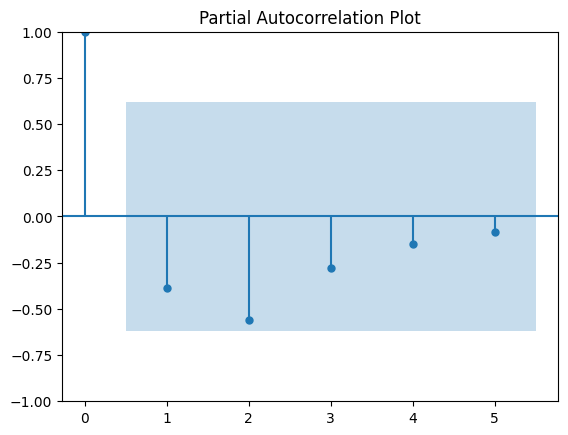

In [18]:
plot_acf(pollution_levels)
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(pollution_levels)
plt.title('Partial Autocorrelation Plot')
plt.show()

# **Task 4: ARIMA Model Fitting**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


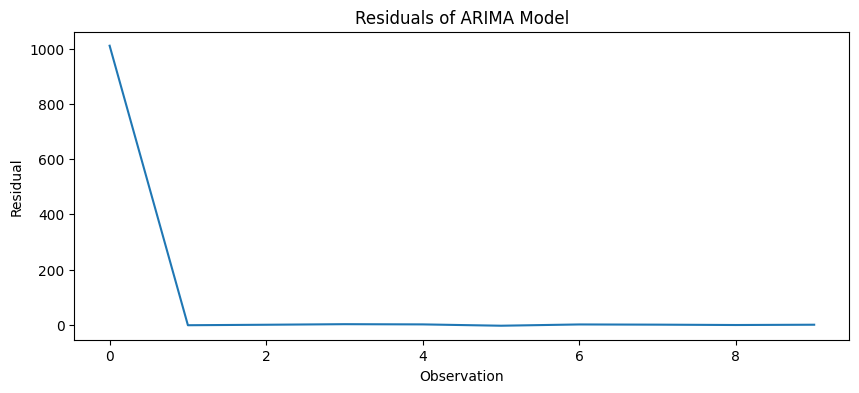

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -17.414
Date:                Fri, 29 Mar 2024   AIC                             40.829
Time:                        12:26:29   BIC                             41.421
Sample:                             0   HQIC                            39.552
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2967      0.445     -0.667      0.505      -1.169       0.576
ma.L1         -0.9985    136.464     -0.007      0.994    -268.464     266.467
sigma2         2.0438    279.075      0.007      0.9

In [20]:
# Define the identified ARIMA parameters
p = 1  # AR terms
d = 1  # Differencing
q = 1  # MA terms

# Fit ARIMA model
model = ARIMA(pollution_levels, order=(p, d, q))
fit_model = model.fit()

# Evaluate model's fit
residuals = fit_model.resid

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

# Summary of the fitted model
print(fit_model.summary())


# **Task 5: Forecasting**

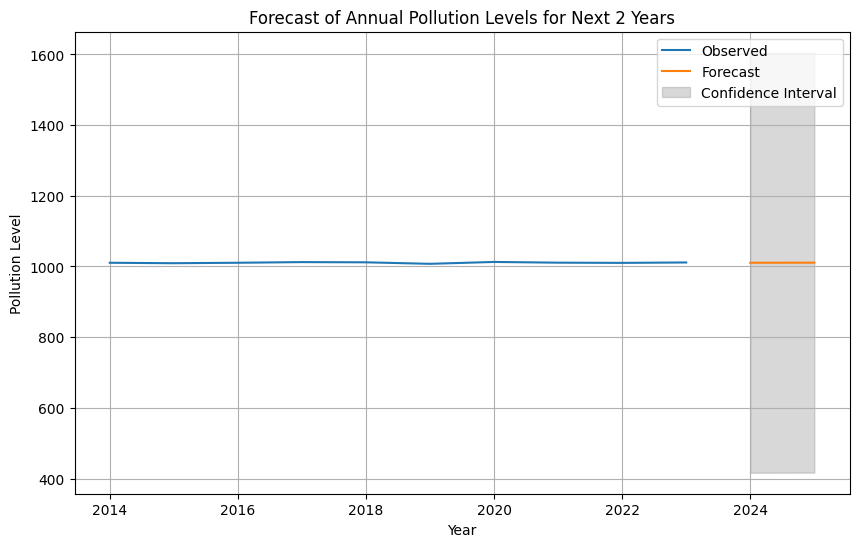

In [22]:
# Forecast next 2 years
forecast_steps = 2
forecast = fit_model.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(years, pollution_levels, label='Observed')
plt.plot(np.arange(2024, 2024 + forecast_steps), forecast, label='Forecast')
plt.fill_between(np.arange(2024, 2024 + forecast_steps), forecast - 1.96 * np.std(residuals), forecast + 1.96 * np.std(residuals), color='gray', alpha=0.3, label='Confidence Interval')
plt.title('Forecast of Annual Pollution Levels for Next 2 Years')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()
